In [2]:
import os, glob
import pandas as pd
import geopandas as gpd
import numpy as np
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sns

Question: When should I visit a certain city?

<h1/>Prepare Data

In [3]:
#parameters setup
local_folder='C:\\Users\\quynhvt5\\Documents\\airbnb\\'
listings_csvs=glob.glob(os.path.join(local_folder, '*_listings.csv'))
listings_columns=['id', 'host_is_superhost', 'latitude', 'longitude', 'review_scores_rating']
calendar_csvs=glob.glob(os.path.join(local_folder, '*_calendar.csv'))
calendar_columns=['listing_id', 'date', 'available', 'price']

In [4]:
#read in a single calendar
city_calendar_csv=local_folder+'Boston_calendar.csv'
city_calendar_iterator=pd.read_csv(city_calendar_csv, header=0, usecols=calendar_columns, iterator=True, chunksize=1000)
city_calendar_df=pd.concat([chunk[chunk['available']== 'f'] for chunk in city_calendar_iterator], axis=0, ignore_index=True)
city_calendar_df.drop(columns='available', inplace=True)
city_calendar_df['date'] = pd.to_datetime(city_calendar_df['date'], format='%Y-%m-%d')
city_calendar_df['price'] = city_calendar_df['price'].replace('[\$,]', '', regex=True).astype(float)
city_calendar_df.head()

,listing_id,date,price
0,13655518,2022-03-20,180.0
1,13655518,2022-03-21,180.0
2,13655518,2022-03-22,180.0
3,13655518,2022-03-23,180.0
4,13655518,2022-03-24,180.0


In [5]:
#any missing data?
print(city_calendar_df.isnull().values.any())
print(city_calendar_df['listing_id'].isnull().values.any())
print(city_calendar_df['date'].isnull().values.any())
print(city_calendar_df['price'].isnull().values.any())

False
False
False
False


<h4/>Great! There is no missing data here.

In [30]:
#groupby the calendar
temp_city_calendar_df = city_calendar_df.groupby('date').agg({'listing_id':'count', 'price':'median'})
temp_city_calendar_df.rename(columns={'listing_id':'listing_id_count', 'price':'price_median'}, inplace=True)
temp_city_calendar_df.reset_index(inplace=True)
temp_city_calendar_df.head()

,date,listing_id_count,price_median
0,2022-03-20,2720,128.5
1,2022-03-21,2463,125.0
2,2022-03-22,2488,129.0
3,2022-03-23,2443,130.0
4,2022-03-24,2672,140.0


<h1/>Evaluate the Results

Text(0, 0.5, 'Total booking per date')

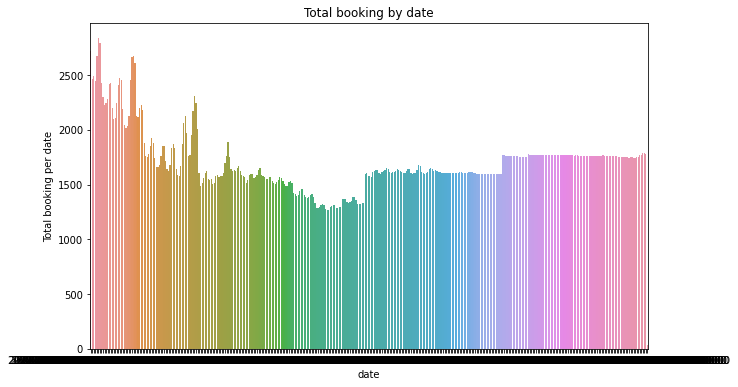

In [ ]:
#plot total booking by date
plt.figure(figsize=(10,6))
plt.title('Total booking by date')
sns.barplot(x=temp_city_calendar_df.date, y=temp_city_calendar_df.listing_id_count)
plt.ylabel('Total booking per date')

Text(0, 0.5, 'Median price per date')

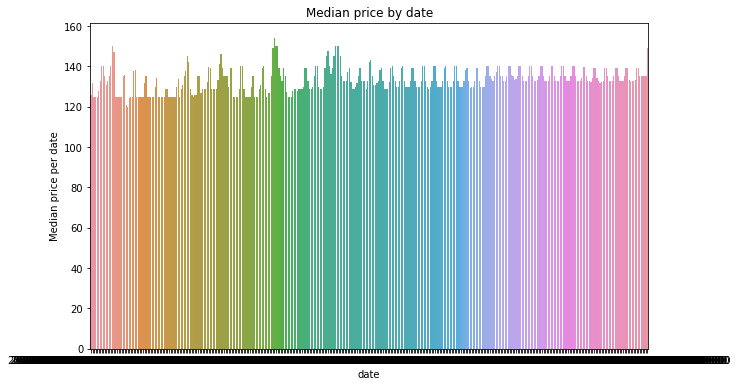

In [7]:
#plot median price by date
plt.figure(figsize=(10,6))
plt.title('Median price by date')
sns.barplot(x=temp_city_calendar_df.date, y=temp_city_calendar_df.price_median)
plt.ylabel('Median price per date')